In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
df.shape

(107, 2)

In [6]:
df.isnull().sum()

Month                                                     1
Perrin Freres monthly champagne sales millions ?64-?72    2
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(105, 2)

In [9]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [10]:
df.rename({'Perrin Freres monthly champagne sales millions ?64-?72':'sales'},axis=1,inplace=True)

In [11]:
df.head()

,Month,sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [12]:
df['Month']=pd.to_datetime(df['Month'])

In [13]:
df.set_index('Month',inplace=True)

In [14]:
df.head()

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [15]:
df.describe()

,sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

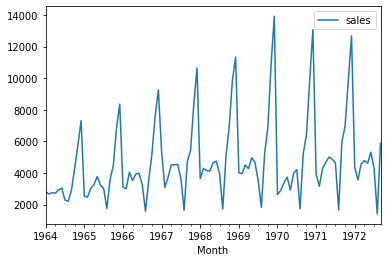

In [16]:
df.plot()

## Testing for stationarity

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['sales'])

In [19]:
test_result

(-1.8335930563276246,
 0.3639157716602442,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [20]:
def adf(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label +':'+ str(value))
    if result[1]<0.05:
        print('Stationary')
    else:
        print('Non stationary')
        

In [21]:
adf(df['sales'])

ADF Test Statistic:-1.8335930563276246
p-value:0.3639157716602442
#Lags Used:11
Number of Observations Used:93
Non stationary


## Differencing

In [22]:
df['sales_1st_diff']=df['sales']-df['sales'].shift(1)

In [23]:
df.head()

,sales,sales_1st_diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [24]:
adf(df['sales_1st_diff'].dropna())

ADF Test Statistic:-7.189896448051026
p-value:2.519620447386696e-10
#Lags Used:11
Number of Observations Used:92
Stationary


In [25]:
df['seasonal_1st_difference']=df['sales']-df['sales'].shift(12)

In [26]:
df

,sales,sales_1st_diff,seasonal_1st_difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1972-05-01,4618.0,-170.0,-392.0
1972-06-01,5312.0,694.0,438.0
1972-07-01,4298.0,-1014.0,-335.0


In [27]:
adf(df.seasonal_1st_difference.dropna())

ADF Test Statistic:-7.626619157213164
p-value:2.060579696813685e-11
#Lags Used:0
Number of Observations Used:92
Stationary


<AxesSubplot:xlabel='Month'>

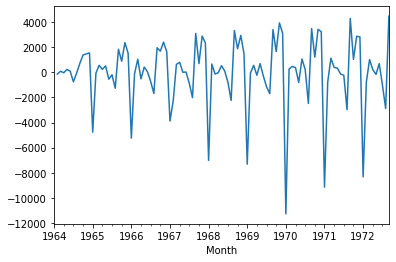

In [28]:
df.sales_1st_diff.plot()

<AxesSubplot:xlabel='Month'>

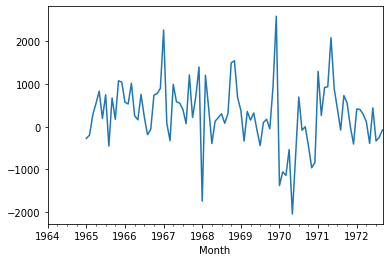

In [29]:
df['seasonal_1st_difference'].plot()

##  Auto Regressive Model

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

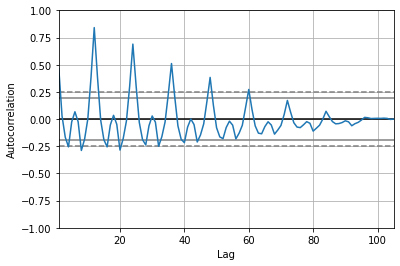

In [40]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

C:\Users\John Joel\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


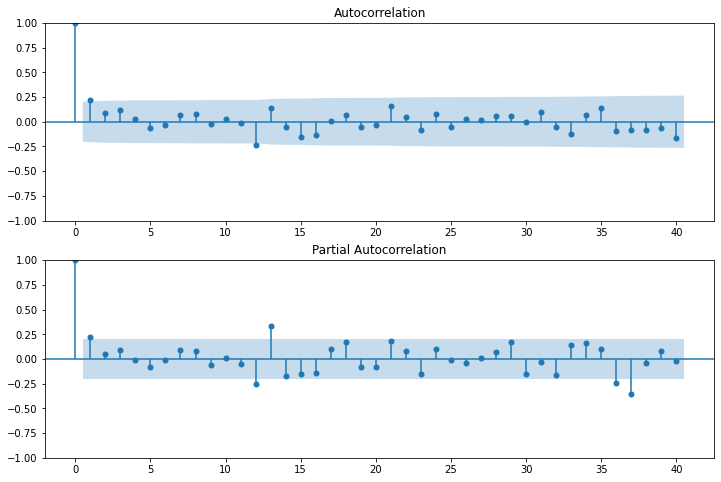

In [46]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig =sm.graphics.tsa.plot_acf(df['seasonal_1st_difference'].dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['seasonal_1st_difference'].dropna(),lags=40,ax=ax2)

### For non-seasonal data
<b> p=1, d=1, q=0 or 1

In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
model=ARIMA(df['sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\John Joel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John Joel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John Joel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [56]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Thu, 13 Jan 2022   AIC                           1911.627
Time:                        03:47:24   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.317      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [61]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)

<AxesSubplot:xlabel='Month'>

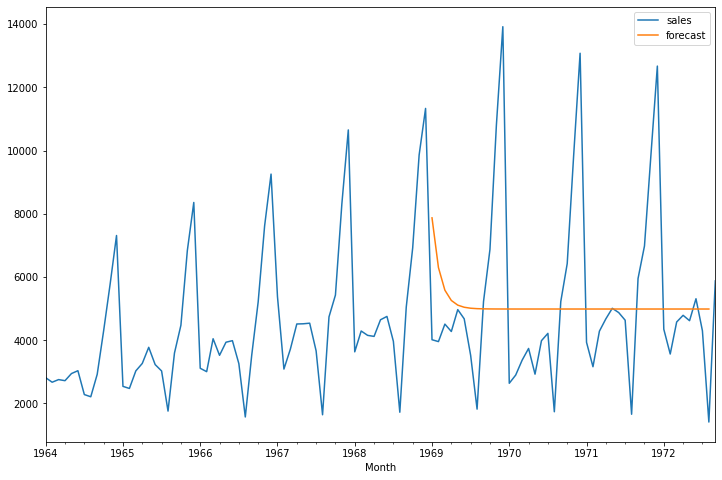

In [60]:
df[['sales','forecast']].plot(figsize=(12,8))

In [62]:
model=sm.tsa.statespace.SARIMAX(df['sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
result=model.fit()

C:\Users\John Joel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\John Joel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

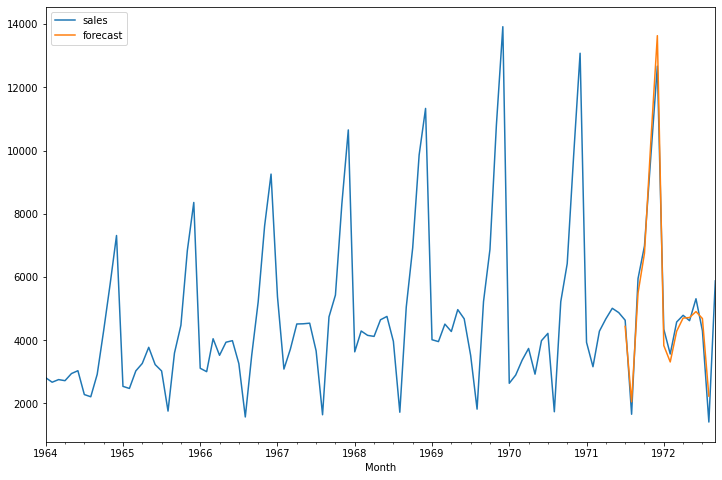

In [63]:
df['forecast']=result.predict(start=90,end=103,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [64]:
from pandas.tseries.offsets import DateOffset

In [65]:
future_dates=[df.index[-1]+DateOffset(months=x) for x in range(0,24)]

In [67]:
future_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [68]:
future_df.head()

,sales,sales_1st_diff,seasonal_1st_difference,forecast
1972-10-01,NaN,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN,NaN


In [69]:
future_df=pd.concat([df,future_df])

In [70]:
future_df.tail()

,sales,sales_1st_diff,seasonal_1st_difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [71]:
future_df.shape

(128, 4)

<AxesSubplot:>

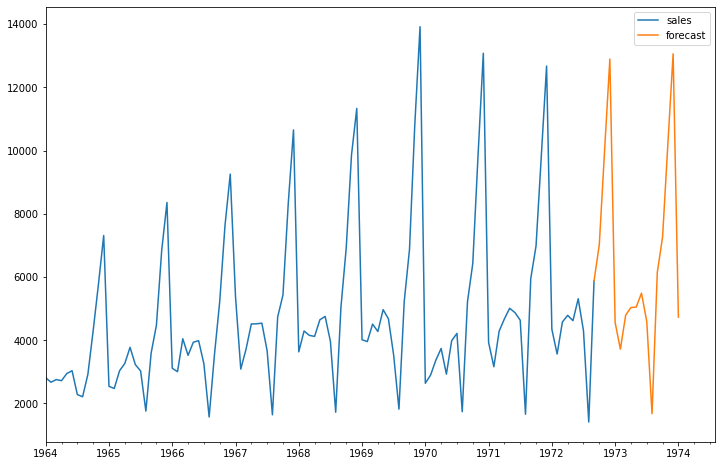

In [74]:
future_df['forecast']=result.predict(start=104,end=120,dynamic=True)
future_df[['sales','forecast']].plot(figsize=(12,8))